In [1]:
# GMM (Gaussian Mixture Model) 장점
# 특정 데이터의 값이 어떤 gaussian 분포에 포함될지 판단
# 데이터가 단순히 원형으로 분포되어 있을 때 뿐만 아닌, 좀더 복잡한 형태 (타원형, 비대칭 등)의 데이터에도 효과적인 클러스터링 가능


# GMM (Gaussian Mixture Model) 단점
# k-means와 지슷하게 사전에 클러스터 개수 지정해야함
# 특정 분포에 할당되는 데이터 수가 작으면 모수 추정이 잘 이뤄지지 않음
# 정규분포를 가정하기 때문에 정규분포가 나오지 않는 범주형 데이터에는 사용할 수 없음




In [2]:
# 0.필요모듈 import
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# 1. make_blobs 를 이용한 데이터 생성

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.5   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정

# make data -> 데이터를 타원형으로 만들기
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

tf = [[0.2, -2], [-0.5, 1]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)


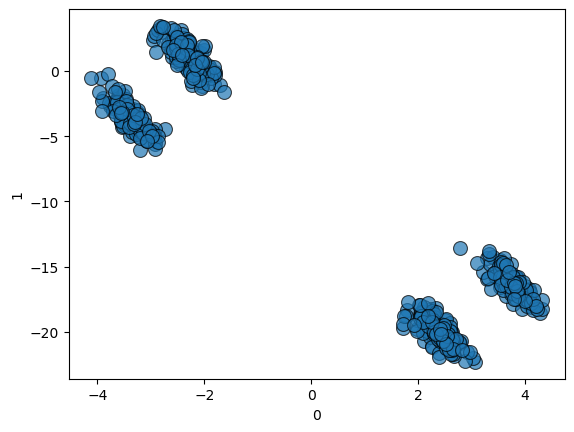

In [4]:
# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=100)

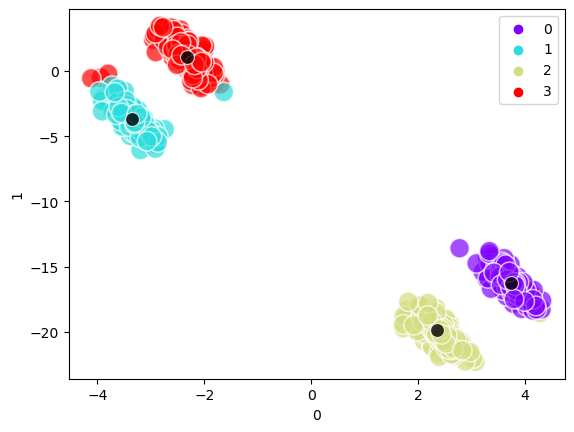

In [5]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=100)

In [6]:
# kmeans 결과 drop
df = df.drop(columns=['kmeans_label'], axis=1)

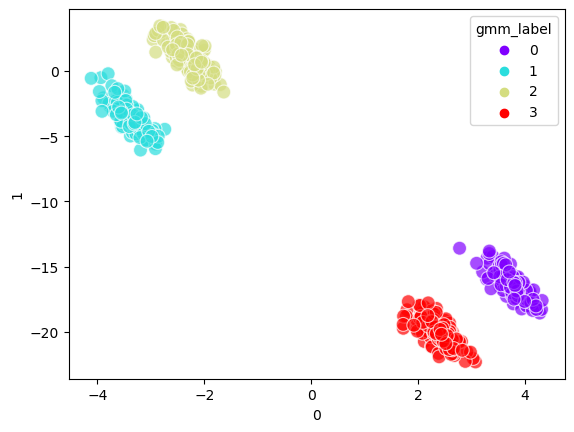

In [7]:
n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=100)